<a href="https://colab.research.google.com/github/aslinurugur/hikodtaslak/blob/main/hikodtamamlanmishali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

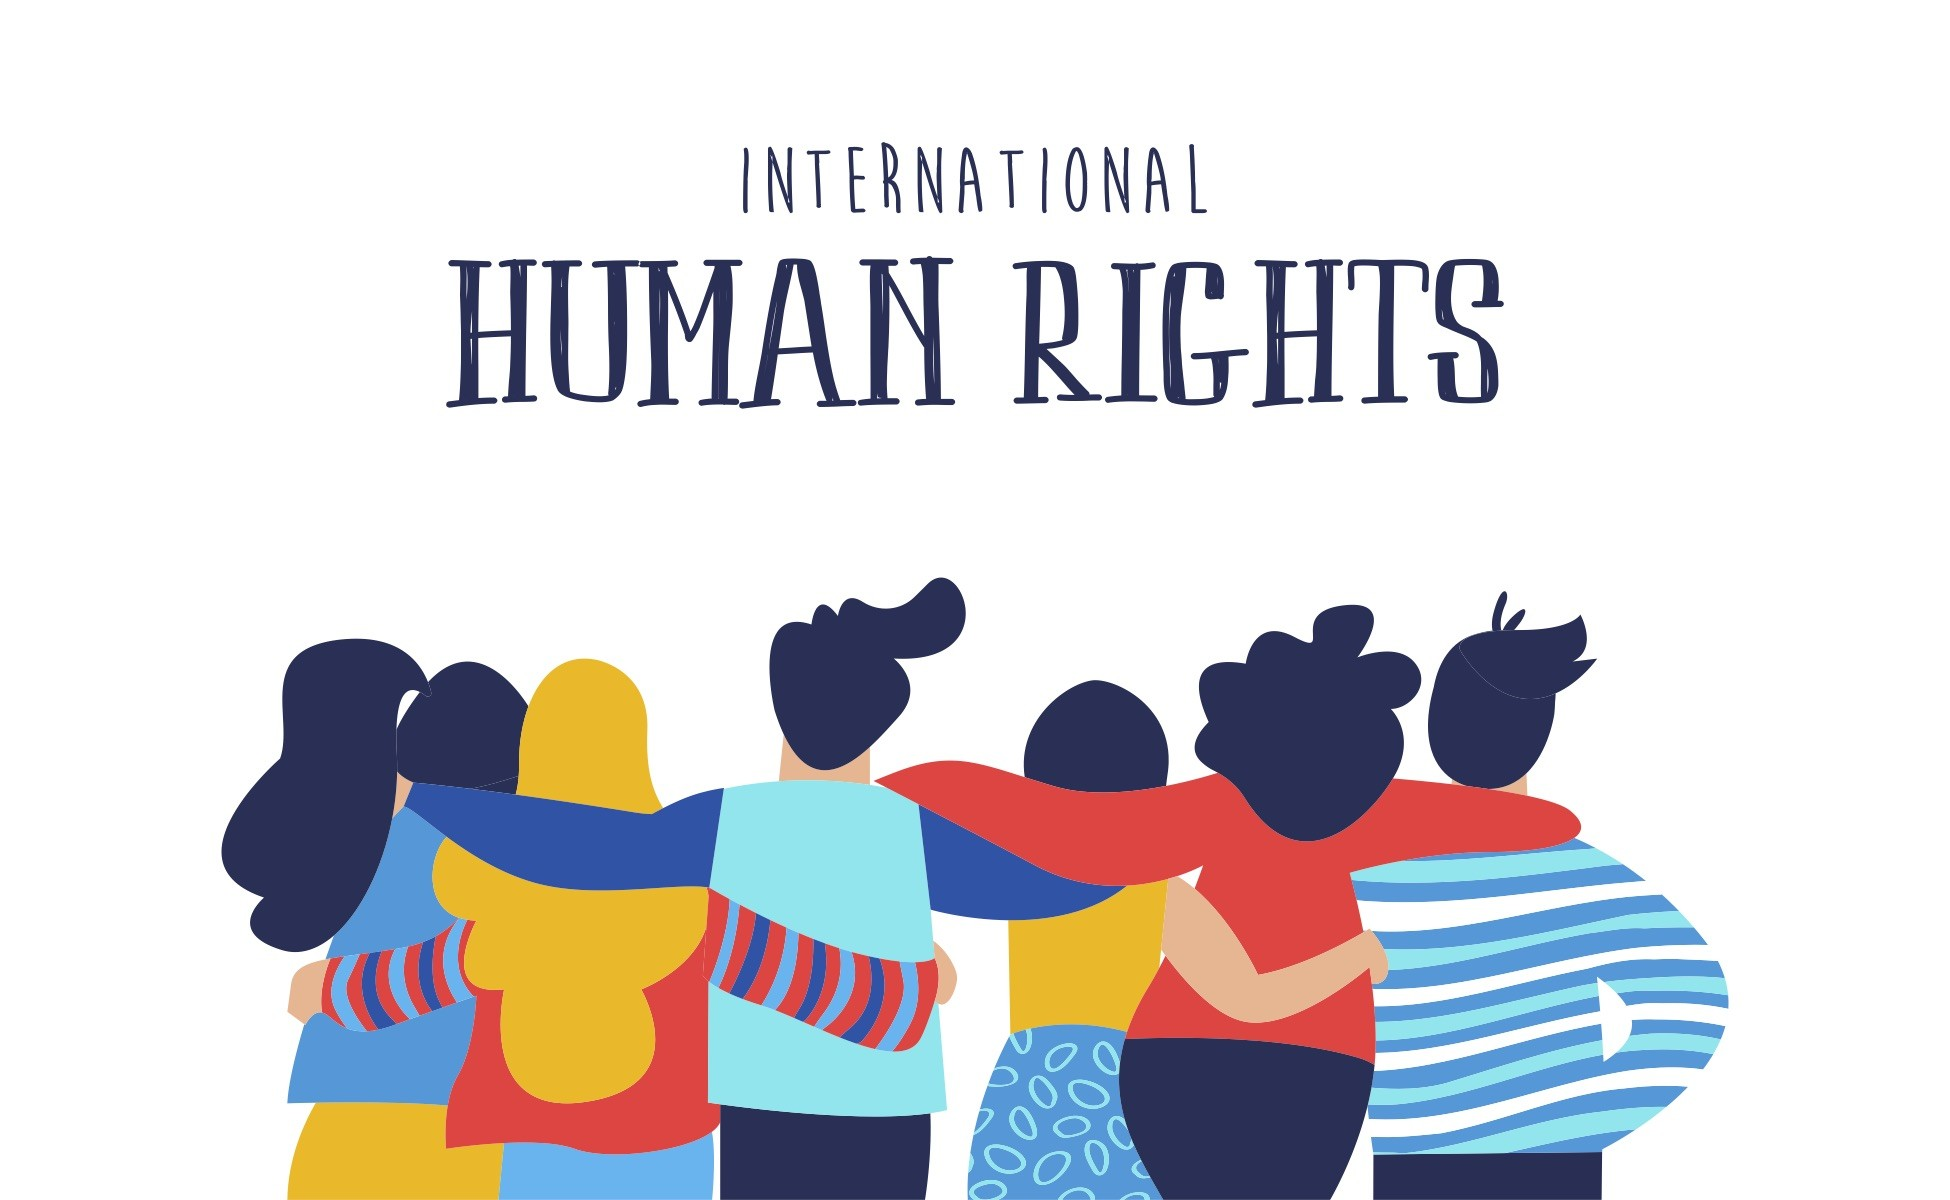

In [ ]:
from IPython.display import display, Image

display(Image(filename="freedom.png"))

# **√ñzg√ºrl√ºk D√ºzeylerinin Analizi: 2013-2022**  

## **Problem Tanƒ±mƒ±**  
D√ºnya genelinde demokratik haklar, √∂zg√ºrl√ºkler ve y√∂netim bi√ßimleri yƒ±llar i√ßinde deƒüi≈üim g√∂stermektedir. Bu projede, **2013-2022 yƒ±llarƒ± arasƒ±ndaki √ºlkelerin √∂zg√ºrl√ºk skorlarƒ±nƒ± analiz ederek b√∂lgesel ve k√ºresel d√ºzeyde nasƒ±l bir deƒüi≈üim ya≈üandƒ±ƒüƒ±nƒ± incelemeyi** ama√ßlƒ±yoruz. Ayrƒ±ca, verileri g√∂rselle≈ütirerek ve makine √∂ƒürenmesi teknikleriyle k√ºmeleme yaparak √ºlkelerin √∂zg√ºrl√ºk seviyeleri a√ßƒ±sƒ±ndan nasƒ±l gruplandƒ±ƒüƒ±nƒ± anlamaya √ßalƒ±≈üacaƒüƒ±z.  

## **A≈üamalar**  
Bu √ßalƒ±≈üma a≈üaƒüƒ±daki temel a≈üamalardan olu≈ümaktadƒ±r:  

### 1. **Veri √ñn ƒ∞≈üleme ve Ke≈üifsel Veri Analizi (EDA):**  
   - Veri k√ºmesinin genel yapƒ±sƒ±nƒ±n incelenmesi  
   - Veri tipleri ve eksik/tekrarlanan verilerin kontrol√º  
   - Temel istatistiksel analizler  

### 2. **Veri G√∂rselle≈ütirme:**  
   - B√∂lgesel bazda √∂zg√ºrl√ºk skorlarƒ±nƒ±n zaman i√ßindeki deƒüi≈üimi  
   - Se√ßili √ºlkelerin yƒ±llara g√∂re skor deƒüi≈üimlerinin analizi  
   - Boxplot, ƒ±sƒ± haritasƒ± ve d√ºnya haritasƒ± gibi g√∂rselle≈ütirme y√∂ntemleriyle verinin daha iyi anla≈üƒ±lmasƒ±  

### 3. **Makine √ñƒürenmesi ile K√ºmeleme:**  
   - K-means algoritmasƒ± kullanƒ±larak √ºlkelerin √∂zg√ºrl√ºk skorlarƒ±na g√∂re gruplandƒ±rƒ±lmasƒ±  
   - En uygun k√ºme sayƒ±sƒ±nƒ± belirlemek i√ßin dirsek y√∂ntemi ve sil√ºet analizi kullanƒ±mƒ±  
   - K√ºmeleme sonu√ßlarƒ±nƒ±n g√∂rselle≈ütirilmesi  

Bu adƒ±mlar sayesinde √ºlkelerin √∂zg√ºrl√ºk seviyelerindeki deƒüi≈üimleri detaylƒ± bir ≈üekilde analiz ederek, bu deƒüi≈üimlerin b√∂lgesel ve k√ºresel √∂l√ßekte nasƒ±l bir eƒüilim izlediƒüini ortaya koymayƒ± hedefliyoruz.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Gerekli k√ºt√ºphaneler eklendi.

In [ ]:
df = pd.read_csv("Freedom-in-the-World-2013-2022-Dataset.csv") #Veriseti y√ºklendi.


In [ ]:
df.head() #ƒ∞lk 5 veri g√∂r√ºnt√ºlendi.

Country/Territory   Region C/T  Edition Status  PR rating  CL rating  A1  \
0          Abkhazia  Eurasia   t     2022     PF          5          5   2   
1       Afghanistan     Asia   c     2022     NF          7          6   0   
2           Albania   Europe   c     2022     PF          3          3   3   
3           Algeria   Africa   c     2022     NF          6          5   1   
4           Andorra   Europe   c     2022      F          1          1   4   

   A2  A3  ...  F3  F4   F  G1  G2  G3  G4   G  CL  Total  
0   2   1  ...   1   1   4   1   1   2   1   5  23     40  
1   0   0  ...   0   0   0   0   1   0   1   2   9     10  
2   3   3  ...   2   3   9   3   2   2   2   9  39     67  
3   1   1  ...   2   2   6   2   2   2   1   7  22     32  
4   4   4  ...   4   3  15   4   4   3   4  15  55     93  

[5 rows x 42 columns]

In [ ]:
df.tail() #Son 5 veri g√∂r√ºnt√ºlendi.

Country/Territory       Region C/T  Edition Status  PR rating  CL rating  \
2090         West Bank  Middle East   t     2013     NF          6          5   
2091    Western Sahara       Africa   t     2013     NF          7          7   
2092             Yemen  Middle East   c     2013     NF          6          6   
2093            Zambia       Africa   c     2013     PF          3          4   
2094          Zimbabwe       Africa   c     2013     NF          6          6   

      A1  A2  A3  ...  F3  F4  F  G1  G2  G3  G4  G  CL  Total  
2090   0   0   2  ...   0   1  5   1   1   2   1  5  24     30  
2091   0   0   0  ...   0   0  0   1   1   2   0  4   7      5  
2092   1   0   2  ...   0   1  2   2   1   1   1  5  16     25  
2093   3   3   3  ...   2   2  8   3   2   1   2  8  34     62  
2094   1   1   1  ...   0   0  1   1   1   1   1  4  14     25  

[5 rows x 42 columns]

### üåç üèõÔ∏è √ñzg√ºrl√ºk Endeksi S√ºtun A√ßƒ±klamalarƒ±

| üè∑Ô∏è **Kƒ±sa ƒ∞sim** | üìù **A√ßƒ±klama** |
|-----------------|------------------------------------------------------|
| üè≥Ô∏è **C/T**      | √úlke (**C**) mi, B√∂lge (**T**) mi? |
| üü¢ **Status**   | √ñzg√ºrl√ºk Durumu: **üü¢ F (√ñzg√ºr), üü° PF (Kƒ±smen √ñzg√ºr), üî¥ NF (√ñzg√ºr Deƒüil)** |
| üó≥Ô∏è **PR Rating** | üèõÔ∏è Siyasal Haklar Derecelendirmesi (1-7) |
| ‚öñÔ∏è **CL Rating** | üïäÔ∏è Sivil √ñzg√ºrl√ºkler Derecelendirmesi (1-7) |

### üó≥Ô∏è **A - Se√ßim S√ºreci**
- **A1** ‚úÖ Mevcut y√∂netici √∂zg√ºr ve adil se√ßimle mi geldi?  
- **A2** üó≥Ô∏è Yasama √ºyeleri √∂zg√ºr ve adil se√ßimle mi se√ßildi?  
- **A3** ‚öñÔ∏è Se√ßim yasalarƒ± adil mi ve tarafsƒ±z uygulanƒ±yor mu?  

### üèõÔ∏è **B - Siyasi √áoƒüulculuk ve Katƒ±lƒ±m**
- **B1** üîÄ Halk, farklƒ± partilere katƒ±lma √∂zg√ºrl√ºƒü√ºne sahip mi?  
- **B2** üèõÔ∏è Muhalefetin g√º√ß kazanma ≈üansƒ± var mƒ±?  
- **B3** üîó Politik se√ßimler, baskƒ± ve manip√ºlasyondan baƒüƒ±msƒ±z mƒ±?  
- **B4** üåç Etnik, dini, toplumsal gruplarƒ±n siyasi haklarƒ± var mƒ±?  

### üëî **C - H√ºk√ºmetin ƒ∞≈üleyi≈üi**
- **C1** üèõÔ∏è √ñzg√ºrce se√ßilmi≈ü liderler politikalarƒ± belirleyebiliyor mu?  
- **C2** üí∞ Yolsuzlukla m√ºcadele mekanizmalarƒ± etkili mi?  
- **C3** üëÄ H√ºk√ºmet ≈üeffaf ve a√ßƒ±k mƒ±?  

### üèõÔ∏è **PR - Siyasal Haklar Skoru**  

### üó£Ô∏è **D - ƒ∞fade ve ƒ∞nan√ß √ñzg√ºrl√ºƒü√º**
- **D1** üì∞ Basƒ±n √∂zg√ºrl√ºƒü√º var mƒ±?  
- **D2** üèõÔ∏è Dini inan√ßlar √∂zg√ºrce ifade edilebiliyor mu?  
- **D3** üéì Akademik √∂zg√ºrl√ºk korunuyor mu?  
- **D4** üó®Ô∏è Bireyler politik g√∂r√º≈ülerini √∂zg√ºrce ifade edebiliyor mu?  

### ü§ù **E - Dernek ve √ñrg√ºtlenme √ñzg√ºrl√ºƒü√º**
- **E1** üì¢ Toplantƒ± ve g√∂steri yapma hakkƒ± var mƒ±?  
- **E2** üè¢ STK‚Äôlar √∂zg√ºrce √ßalƒ±≈üabiliyor mu?  
- **E3** ‚öñÔ∏è Sendikalar baƒüƒ±msƒ±z ve √∂zg√ºr m√º?  

### ‚öñÔ∏è **F - Hukukun √úst√ºnl√ºƒü√º**
- **F1** ‚öñÔ∏è Yargƒ± baƒüƒ±msƒ±z mƒ±?  
- **F2** üèõÔ∏è Adil yargƒ±lama var mƒ±?  
- **F3** üöî Polis ve g√ºvenlik g√º√ßleri keyfi ≈üiddet uyguluyor mu?  
- **F4** üè≥Ô∏è Farklƒ± topluluklar yasalar kar≈üƒ±sƒ±nda e≈üit mi?  

### üö∂‚Äç‚ôÄÔ∏è **G - Bireysel √ñzg√ºrl√ºkler**
- **G1** üöó Hareket √∂zg√ºrl√ºƒü√º var mƒ±?  
- **G2** üè° M√ºlkiyet haklarƒ± g√ºvence altƒ±nda mƒ±?  
- **G3** ‚ù§Ô∏è Ki≈üisel haklar (evlilik, aile planlamasƒ±) korunuyor mu?  
- **G4** üíº Ekonomik s√∂m√ºr√ºye kar≈üƒ± koruma var mƒ±?  

### üìä **CL - Sivil √ñzg√ºrl√ºkler Skoru**  

### üåü **Total - Toplam Skor**


In [ ]:
df.info() #veriseti hakkƒ±nda bilgiler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  2095 non-null   object
 1   Region             2095 non-null   object
 2   C/T                2095 non-null   object
 3   Edition            2095 non-null   int64 
 4   Status             2095 non-null   object
 5   PR rating          2095 non-null   int64 
 6   CL rating          2095 non-null   int64 
 7   A1                 2095 non-null   int64 
 8   A2                 2095 non-null   int64 
 9   A3                 2095 non-null   int64 
 10  A                  2095 non-null   int64 
 11  B1                 2095 non-null   int64 
 12  B2                 2095 non-null   int64 
 13  B3                 2095 non-null   int64 
 14  B4                 2095 non-null   int64 
 15  B                  2095 non-null   int64 
 16  C1                 2095 non-null   int64 


In [ ]:
df["C/T"].unique() #C/T s√ºtunundaki e≈üsiz deƒüerlere bakƒ±ldƒ±. Kategorik bir veri olduƒüu anla≈üƒ±lƒ±yor.

array(['t', 'c'], dtype=object)

In [ ]:
df["C/T"] = df["C/T"].astype("category")
df["Status"] = df["Status"].astype("category")
df['Edition'] = pd.to_datetime(df['Edition'], format='%Y').dt.year #"C/T", "Status" s√ºtunlarƒ± kategorik, "Edition" s√ºtunu tarih formatƒ±nda deƒüi≈ütirildi.




In [ ]:
df.info() #Veri tiplerinin d√ºzeltilmi≈ü hali.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Country/Territory  2095 non-null   object  
 1   Region             2095 non-null   object  
 2   C/T                2095 non-null   category
 3   Edition            2095 non-null   int32   
 4   Status             2095 non-null   category
 5   PR rating          2095 non-null   int64   
 6   CL rating          2095 non-null   int64   
 7   A1                 2095 non-null   int64   
 8   A2                 2095 non-null   int64   
 9   A3                 2095 non-null   int64   
 10  A                  2095 non-null   int64   
 11  B1                 2095 non-null   int64   
 12  B2                 2095 non-null   int64   
 13  B3                 2095 non-null   int64   
 14  B4                 2095 non-null   int64   
 15  B                  2095 non-null   int64   
 16  C1    

In [ ]:
df.isna().sum() #Bo≈ü deƒüer kontrol√º.

Country/Territory    0
Region               0
C/T                  0
Edition              0
Status               0
PR rating            0
CL rating            0
A1                   0
A2                   0
A3                   0
A                    0
B1                   0
B2                   0
B3                   0
B4                   0
B                    0
C1                   0
C2                   0
C3                   0
C                    0
PR                   0
D1                   0
D2                   0
D3                   0
D4                   0
D                    0
E1                   0
E2                   0
E3                   0
E                    0
F1                   0
F2                   0
F3                   0
F4                   0
F                    0
G1                   0
G2                   0
G3                   0
G4                   0
G                    0
CL                   0
Total                0
dtype: int64

In [ ]:
# Aynƒ± satƒ±rlar var mƒ± diye kontrol edildi.
duplicate_rows = df[df.duplicated(keep=False)]
# ilk 10 aynƒ± satƒ±r
duplicate_rows.head(10)

Empty DataFrame
Columns: [Country/Territory, Region, C/T, Edition, Status, PR rating, CL rating, A1, A2, A3, A, B1, B2, B3, B4, B, C1, C2, C3, C, PR, D1, D2, D3, D4, D, E1, E2, E3, E, F1, F2, F3, F4, F, G1, G2, G3, G4, G, CL, Total]
Index: []

[0 rows x 42 columns]

In [ ]:
df.describe().T #ƒ∞statiksel analiz

count         mean        std     min     25%     50%     75%  \
Edition    2095.0  2017.503103   2.873464  2013.0  2015.0  2018.0  2020.0   
PR rating  2095.0     3.575656   2.211561     1.0     1.0     3.0     6.0   
CL rating  2095.0     3.458234   1.932492     1.0     2.0     3.0     5.0   
A1         2095.0     2.412888   1.615921     0.0     1.0     3.0     4.0   
A2         2095.0     2.523628   1.527616     0.0     1.0     3.0     4.0   
A3         2095.0     2.391885   1.419146     0.0     1.0     3.0     4.0   
A          2095.0     7.328401   4.425660     0.0     3.0     9.0    12.0   
B1         2095.0     2.599523   1.401493     0.0     1.0     3.0     4.0   
B2         2095.0     2.466826   1.572119     0.0     1.0     3.0     4.0   
B3         2095.0     2.253461   1.435066     0.0     1.0     2.0     4.0   
B4         2095.0     2.280191   1.242461     0.0     1.0     3.0     3.0   
B          2095.0     9.600000   5.380498     0.0     5.0    11.0    15.0   
C1         2095.0     2.259666   1.516975     0.0     1.0     2.0     4.0   
C2         2095.0     1.854893   1.169063     0.0     1.0     2.0     3.0   
C3         2095.0     1.961337   1.291340     0.0     1.0     2.0     3.0   
C          2095.0     6.075895   3.736864     0.0     3.0     6.0    10.0   
PR         2095.0    22.848687  13.464039    -3.0    10.0    26.0    36.0   
D1         2095.0     2.127924   1.287979     0.0     1.0     2.0     3.0   
D2         2095.0     2.817184   1.261240     0.0     2.0     3.0     4.0   
D3         2095.0     2.739857   1.277463     0.0     2.0     3.0     4.0   
D4         2095.0     2.851074   1.200433     0.0     2.0     3.0     4.0   
D          2095.0    10.536038   4.664126     0.0     7.0    12.0    15.0   
E1         2095.0     2.396659   1.452754     0.0     1.0     3.0     4.0   
E2         2095.0     2.485919   1.420167     0.0     1.0     3.0     4.0   
E3         2095.0     2.389021   1.266335     0.0     1.0     2.0     3.0   
E          2095.0     7.271599   3.963447     0.0     4.0     8.0    11.0   
F1         2095.0     2.034368   1.394409     0.0     1.0     2.0     3.0   
F2         2095.0     1.964678   1.334894     0.0     1.0     2.0     3.0   
F3         2095.0     2.000477   1.390547     0.0     1.0     2.0     3.0   
F4         2095.0     1.850597   1.101843     0.0     1.0     2.0     3.0   
F          2095.0     7.850119   4.941150     0.0     4.0     7.0    12.0   
G1         2095.0     2.633890   1.254256     0.0     2.0     3.0     4.0   
G2         2095.0     2.364200   1.102466     0.0     2.0     2.0     3.0   
G3         2095.0     2.291169   1.046755     0.0     2.0     2.0     3.0   
G4         2095.0     2.002387   1.057332     0.0     1.0     2.0     3.0   
G          2095.0     9.291647   4.153617     0.0     6.0     9.0    13.0   
CL         2095.0    34.949403  17.126707     1.0    20.5    36.0    51.0   
Total      2095.0    57.798091  30.288533    -1.0    30.0    62.0    87.0   

              max  
Edition    2022.0  
PR rating     7.0  
CL rating     7.0  
A1            4.0  
A2            4.0  
A3            4.0  
A            12.0  
B1            4.0  
B2            4.0  
B3            4.0  
B4            4.0  
B            16.0  
C1            4.0  
C2            4.0  
C3            4.0  
C            12.0  
PR           40.0  
D1            4.0  
D2            4.0  
D3            4.0  
D4            4.0  
D            16.0  
E1            4.0  
E2            4.0  
E3            4.0  
E            12.0  
F1            4.0  
F2            4.0  
F3            4.0  
F4            4.0  
F            16.0  
G1            4.0  
G2            4.0  
G3            4.0  
G4            4.0  
G            16.0  
CL           60.0  
Total       100.0

In [ ]:
df.shape #Veri setinin satƒ±r,s√ºtun bilgisi.

(2095, 42)

In [ ]:
df["Edition"].unique() #Hangi yƒ±llar olduƒüu kontrol edildi.

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013],
      dtype=int32)

In [ ]:
pip install plotly pandas


In [ ]:
import pandas as pd
import plotly.express as px


In [ ]:
df["Country/Territory"].unique() #Hangi √ºlkeler olduƒüu kontrol edildi.

array(['Abkhazia', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Crimea', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Donbas', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gaza Strip', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenad

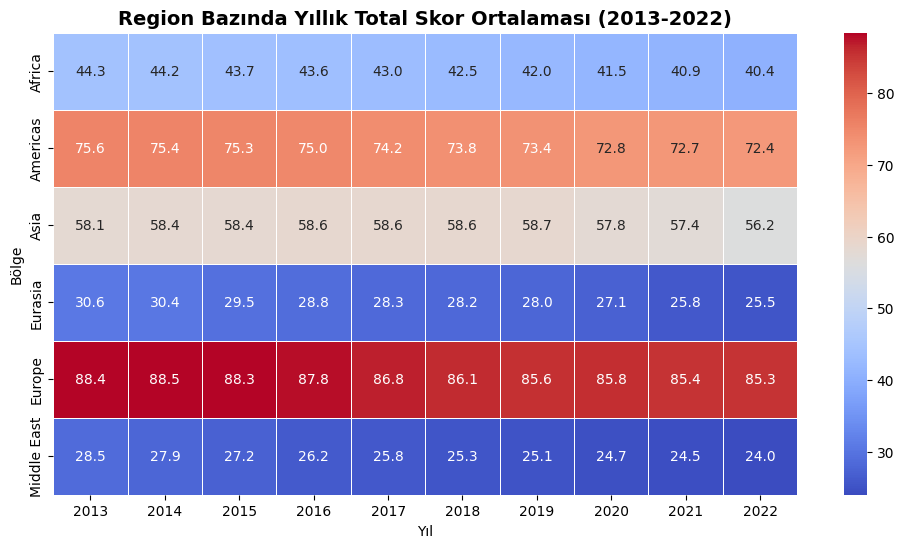

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Region - Edition bazƒ±nda ortalamayƒ± alarak tekrar edenler kaldƒ±rƒ±ldƒ±.
df_grouped = df.groupby(["Region", "Edition"], as_index=False)["Total"].mean()

# Veri pivot tabloya √ßevrildi.
pivot_df = df_grouped.pivot(index="Region", columns="Edition", values="Total")

# Isƒ± haritasƒ± √ßizildi.
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f")

# Ba≈ülƒ±k ve eksen etiketleri belirlendi.
plt.title("Region Bazƒ±nda Yƒ±llƒ±k Total Skor Ortalamasƒ± (2013-2022)", fontsize=14, fontweight="bold")
plt.xlabel("Yƒ±l")
plt.ylabel("B√∂lge")

plt.show()


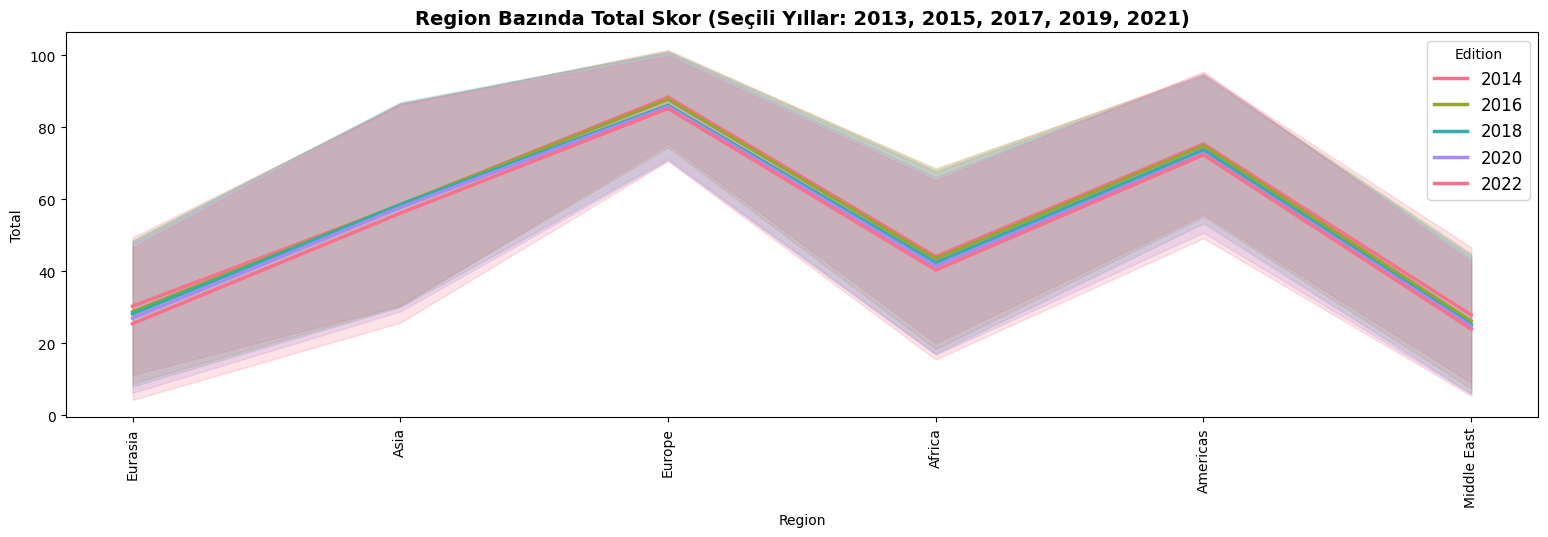

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bo≈ü bir liste olu≈üturuldu.
df_filtered = []

# Her satƒ±r i√ßin ko≈üul kontrol√º yapƒ±ldƒ±.
for index, row in df.iterrows():
    if row["Edition"] in [2014, 2016, 2018, 2020, 2022]:
        df_filtered.append(row)

# Liste DataFrame' e √ßevrildi.
df_filtered = pd.DataFrame(df_filtered)


plt.figure(figsize=(19,5))  # Fig√ºr boyutu belirlendi.

# Renk paleti se√ßildi.
sns.lineplot(x="Region", y="Total", hue="Edition", data=df_filtered, palette="husl", linewidth=2.5, errorbar="sd")

# Ba≈ülƒ±k ve eksen ayarlarƒ± yapƒ±ldƒ±.
plt.title("Region Bazƒ±nda Total Skor (Se√ßili Yƒ±llar: 2013, 2015, 2017, 2019, 2021)", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(title="Edition", fontsize=12)

plt.show()

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt #Gerekli k√ºt√ºphaneler eklendi.

In [ ]:
fig = make_subplots(rows=3,cols=2) ## 3 satƒ±r ve 2 s√ºtundan olu≈üan 6 subplot'lƒ± bir ƒ±zgara olu≈üturuldu.

In [ ]:
data_method = df.groupby(["Edition", "Region"])[["Total"]].sum().reset_index() #"Edition" ve "Region" s√ºtunlarƒ±na g√∂re gruplama yapƒ±larak "Total" s√ºtunlarƒ±nƒ±n toplamƒ± alƒ±ndƒ±.
data_method

Edition       Region  Total
0      2013       Africa   2482
1      2013     Americas   2721
2      2013         Asia   2498
3      2013      Eurasia    489
4      2013       Europe   3802
5      2013  Middle East    428
6      2014       Africa   2473
7      2014     Americas   2716
8      2014         Asia   2512
9      2014      Eurasia    486
10     2014       Europe   3804
11     2014  Middle East    419
12     2015       Africa   2449
13     2015     Americas   2712
14     2015         Asia   2513
15     2015      Eurasia    501
16     2015       Europe   3798
17     2015  Middle East    408
18     2016       Africa   2439
19     2016     Americas   2699
20     2016         Asia   2520
21     2016      Eurasia    490
22     2016       Europe   3777
23     2016  Middle East    393
24     2017       Africa   2406
25     2017     Americas   2596
26     2017         Asia   2518
27     2017      Eurasia    481
28     2017       Europe   3732
29     2017  Middle East    387
30     2018       Africa   2378
31     2018     Americas   2584
32     2018         Asia   2518
33     2018      Eurasia    480
34     2018       Europe   3704
35     2018  Middle East    379
36     2019       Africa   2354
37     2019     Americas   2570
38     2019         Asia   2522
39     2019      Eurasia    476
40     2019       Europe   3682
41     2019  Middle East    377
42     2020       Africa   2326
43     2020     Americas   2549
44     2020         Asia   2486
45     2020      Eurasia    487
46     2020       Europe   3688
47     2020  Middle East    371
48     2021       Africa   2292
49     2021     Americas   2544
50     2021         Asia   2467
51     2021      Eurasia    465
52     2021       Europe   3673
53     2021  Middle East    367
54     2022       Africa   2263
55     2022     Americas   2534
56     2022         Asia   2416
57     2022      Eurasia    459
58     2022       Europe   3667
59     2022  Middle East    360

In [ ]:
Eurasia = data_method[data_method["Region"]=="Eurasia"]
Asia = data_method[data_method["Region"]=="Asia"]
Europe = data_method[data_method["Region"]=="Europe"]
Africa = data_method[data_method["Region"]=="Africa"]
Americas  = data_method[data_method["Region"]=="Americas"]
Middle_East = data_method[data_method["Region"]=="Middle East"] #B√∂lge bazƒ±nda filtreleme yapƒ±ldƒ±.

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Alt grafiklerin olduƒüu bir fig√ºr olu≈ütur
fig = make_subplots(rows=3, cols=2, subplot_titles=["Eurasia", "Asia", "Europe", "Africa", "Americas", "Middle East"])

# Her b√∂lge i√ßin √ßizgi grafiƒüi ekle
fig.add_trace(go.Scatter(x=Eurasia["Edition"], y=Eurasia["Total"], mode='lines', name="Eurasia"), row=1, col=1)
fig.add_trace(go.Scatter(x=Asia["Edition"], y=Asia["Total"], mode='lines', name="Asia"), row=1, col=2)
fig.add_trace(go.Scatter(x=Europe["Edition"], y=Europe["Total"], mode='lines', name="Europe"), row=2, col=1)
fig.add_trace(go.Scatter(x=Africa["Edition"], y=Africa["Total"], mode='lines', name="Africa"), row=2, col=2)
fig.add_trace(go.Scatter(x=Americas["Edition"], y=Americas["Total"], mode='lines', name="Americas"), row=3, col=1)
fig.add_trace(go.Scatter(x=Middle_East["Edition"], y=Middle_East["Total"], mode='lines', name="Middle East"), row=3, col=2)

# Grafiƒüi g√∂ster
fig.show()



In [ ]:
TR= df[df["Country/Territory"]=="Turkey"][["Edition", "Status"]] # "Turkey" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
US= df[df["Country/Territory"]=="United States"][["Edition", "Status"]] # "United States" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
IR= df[df["Country/Territory"]=="Iran"][["Edition", "Status"]] # "Iran" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
SW= df[df["Country/Territory"]=="Switzerland"][["Edition", "Status"]] # "Switzerland" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
RS= df[df["Country/Territory"]=="Russia"][["Edition", "Status"]] # "Russia" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
TH= df[df["Country/Territory"]=="Thailand"][["Edition", "Status"]] # "Thailand" √ºlkesine ait "Edition" ve "Status" s√ºtunlarƒ± filtrelendi.

In [ ]:
fig2 = make_subplots(rows=3, cols=2)  # 3 satƒ±r ve 2 s√ºtundan olu≈üan bir subplot ƒ±zgarasƒ± olu≈üturuldu.

fig2.append_trace(go.Scatter(x=TR["Edition"], y=TR["Status"], name="Turkey", mode="lines"), row=1, col=1)
fig2.append_trace(go.Scatter(x=US["Edition"], y=US["Status"], name="United States", mode="lines"), row=1, col=2)
fig2.append_trace(go.Scatter(x=IR["Edition"], y=IR["Status"], name="Iran", mode="lines"), row=2, col=1)
fig2.append_trace(go.Scatter(x=SW["Edition"], y=SW["Status"], name="Switzerland", mode="lines"), row=2, col=2)
fig2.append_trace(go.Scatter(x=RS["Edition"], y=RS["Status"], name="Russia", mode="lines"), row=3, col=1)
fig2.append_trace(go.Scatter(x=TH["Edition"], y=TH["Status"], name="Thailand", mode="lines"), row=3, col=2)

fig2.show()


In [ ]:
df["Region"].unique() #Hangi b√∂lgelerin olduƒüuna bakƒ±ldƒ±.

array(['Eurasia', 'Asia', 'Europe', 'Africa', 'Americas', 'Middle East'],
      dtype=object)

In [ ]:
africa_data = df[df["Region"] == "Africa"] # "Afrika" b√∂lgesi filtrelendi.

In [ ]:
africa_averages = africa_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Afrika" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

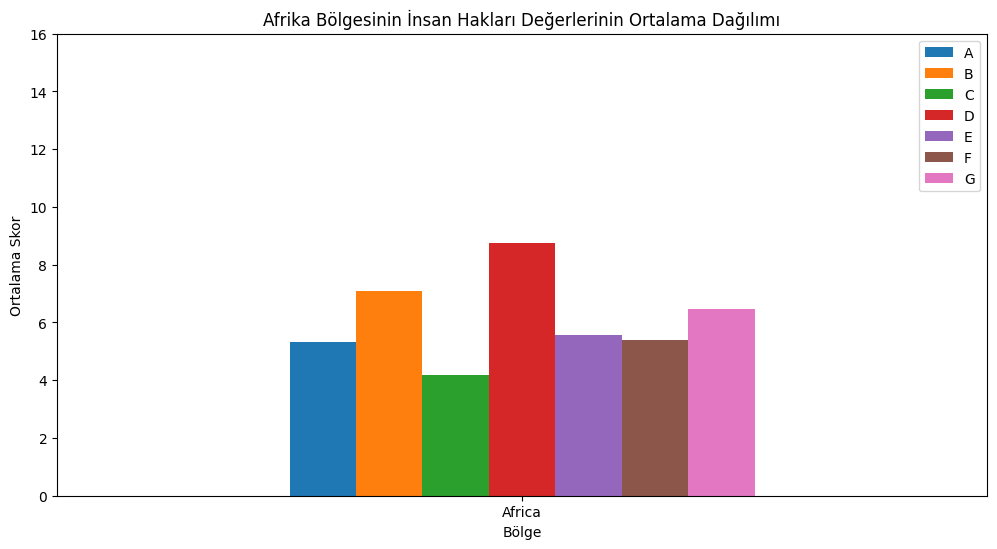

In [ ]:
africa_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Afrika B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Africa" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
eurasia_data = df[df["Region"] == "Eurasia"] # "Eurasia" b√∂lgesi filtrelendi.

In [ ]:
eurasia_averages = eurasia_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Eurasia" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

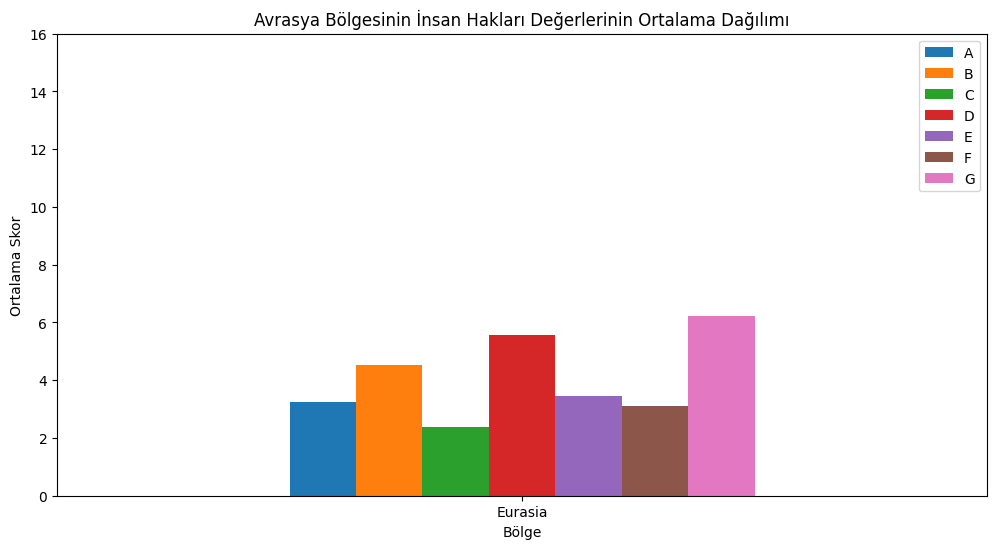

In [ ]:
eurasia_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Avrasya B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Eurasia" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
asia_data = df[df["Region"] == "Asia"] # "Asia" b√∂lgesi filtrelendi.

In [ ]:
asia_averages = asia_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean()  # "Asia" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

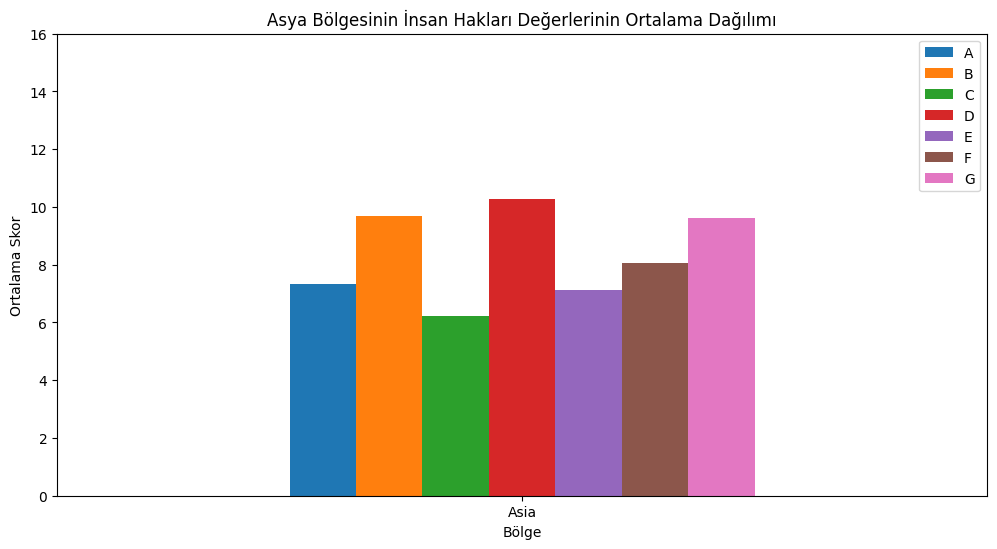

In [ ]:
asia_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Asya B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Asia" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
europe_data = df[df["Region"] == "Europe"] # "Europe" b√∂lgesi filtrelendi.

In [ ]:
europe_averages = europe_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean()  # "Europe" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

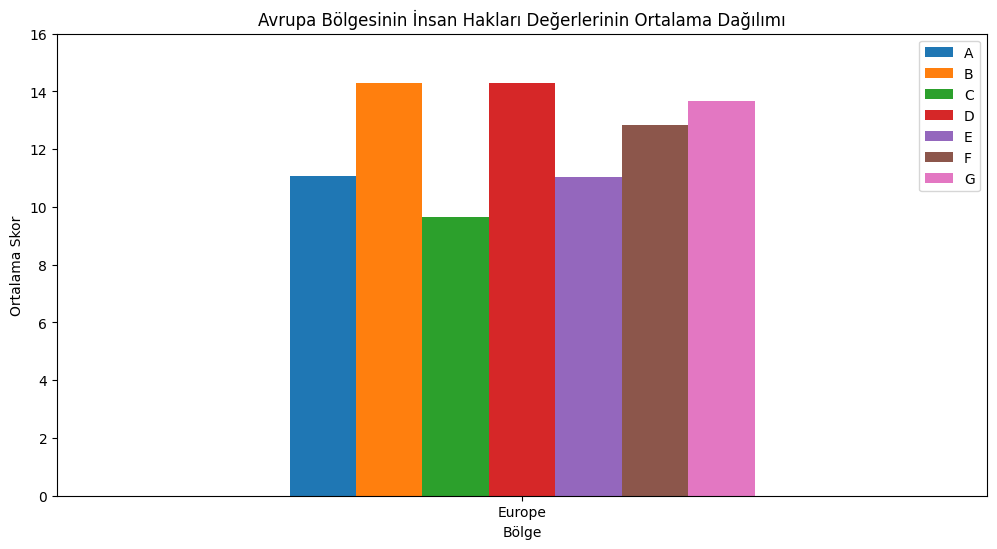

In [ ]:
europe_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Avrupa B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Europe" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
americas_data = df[df["Region"] == "Americas"] # "Americas" b√∂lgesi filtrelendi.

In [ ]:
americas_averages = americas_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Americas" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

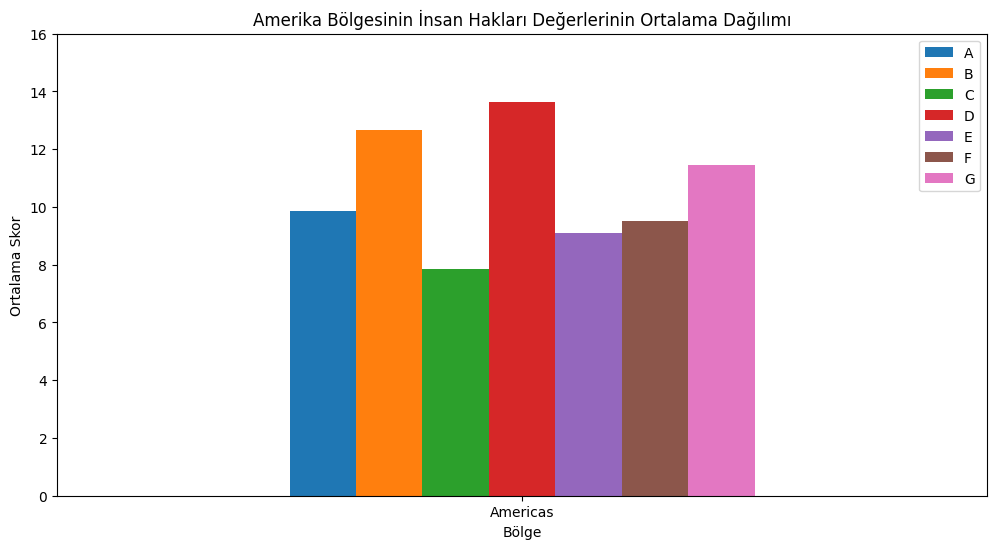

In [ ]:
americas_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Amerika B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Americas" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
middleeast_data = df[df["Region"] == "Middle East"] # "Middle East" b√∂lgesi filtrelendi.

In [ ]:
middleeast_averages = middleeast_data.groupby("Region")[["A","B","C","D","E","F","G"]].mean() # "Middle East" b√∂lgesinin ortalama deƒüerleri gruplandƒ±larak alƒ±ndƒ±.

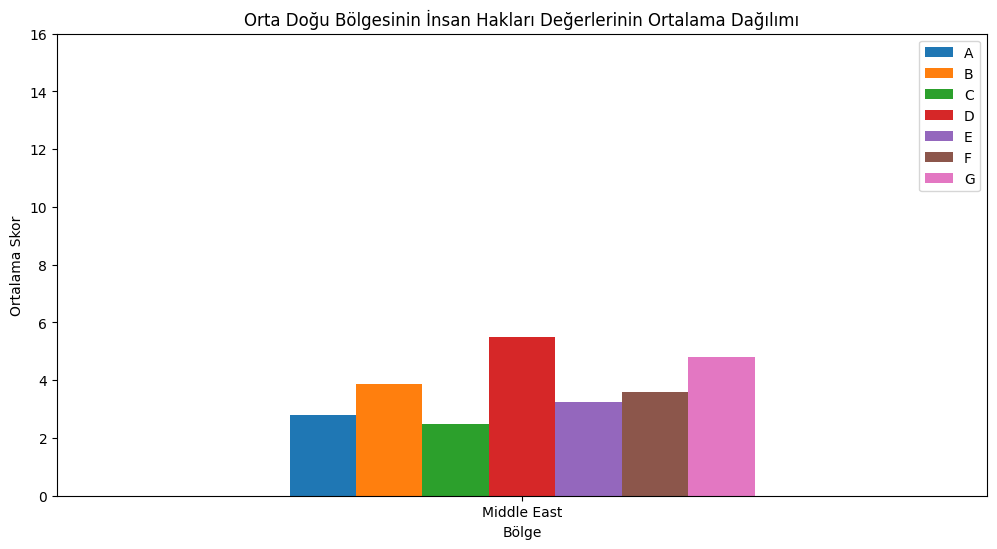

In [ ]:
middleeast_averages.plot(kind = "bar", figsize = (12,6))
plt.title("Orta Doƒüu B√∂lgesinin ƒ∞nsan Haklarƒ± Deƒüerlerinin Ortalama Daƒüƒ±lƒ±mƒ±")
plt.xlabel("B√∂lge")
plt.ylabel("Ortalama Skor")
plt.xticks(rotation=0);
plt.ylim(0,16)
plt.show() # "Middle East" b√∂lgesinin grafiƒüi olu≈üturuldu.

In [ ]:
!pip install dash
import dash
from dash import dcc, html, Output, Input
import plotly.graph_objects as go #dash k√ºt√ºphanesi eklendi.

In [ ]:
# Dash uygulamasƒ±nƒ± ba≈ülatƒ±ldƒ±.
app = dash.Dash(__name__)

In [ ]:
df_yearly = df[df["Edition"].isin(range(2013, 2023))] # 2013-2022 yƒ±llarƒ± arasƒ±ndaki veriler filtrelendi.
df_map = df_yearly[["Country/Territory", "Edition", "Total"]].copy() # Yƒ±l, √ºlke ve toplam skor se√ßilip kopyalandƒ±.
df_map.columns = ["Country", "Year", "Freedom Score"] # S√ºtun isimleri "Country", "Year", "Freedom Score" olarak deƒüi≈ütirildi.

In [ ]:
# Ba≈ülangƒ±√ß yƒ±lƒ±
initial_year = 2013
df_initial = df_map[df_map["Year"] == initial_year]


In [ ]:
# Harita i√ßin ba≈ülangƒ±√ß fig√ºr√º
fig_map = go.Figure(go.Choropleth(
    locations=df_initial['Country'],
    z=df_initial['Freedom Score'],
    locationmode='country names',
    colorbar_title="Freedom Score",
    colorscale='Viridis',
    showscale=True,
    hoverinfo='location+z+text',
    text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),
    marker_line_width=0.5,
))

In [ ]:
# Uygulama d√ºzeni
app.layout = html.Div([
    html.H1("Freedom Scores Over Time", style={'text-align': 'center', 'margin-bottom': '20px'}),

    html.Div([  # Renk Paleti Se√ßimi
        dcc.Dropdown(
            id='colorscale-dropdown',
            options=[
                {'label': 'Viridis', 'value': 'Viridis'},
                {'label': 'Cividis', 'value': 'Cividis'},
                {'label': 'Plasma', 'value': 'Plasma'},
                {'label': 'Inferno', 'value': 'Inferno'},
                {'label': 'Rainbow', 'value': 'Rainbow'},
                {'label': 'Jet', 'value': 'Jet'}
            ],
            value='Viridis',
            style={'width': '45%', 'display': 'inline-block', 'margin': '20px auto'}
        ),
    ], style={'text-align': 'center'}),

    html.Div([  # √úlkeler Arasƒ± Kar≈üƒ±la≈ütƒ±rma
        dcc.Dropdown(
            id='country1-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='United States',
            style={'width': '45%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='country2-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='India',
            style={'width': '45%', 'display': 'inline-block', 'margin-left': '10px'}
        ),
    ], style={'text-align': 'center', 'margin-top': '30px'}),

    html.Div([  # Harita
        dcc.Graph(id="world-map", figure=fig_map, style={'height': '70vh', 'width': '75%', 'display': 'inline-block'})
    ], style={'margin-bottom': '30px'}),

    html.Div([  # Kar≈üƒ±la≈ütƒ±rma grafiƒüi
        dcc.Graph(id="comparison-graph", style={'height': '50vh', 'width': '75%', 'display': 'inline-block'})
    ], style={'margin-top': '30px'}),

], style={'padding': '20px', 'display': 'flex', 'flex-direction': 'column', 'align-items': 'center'})

In [ ]:
@app.callback(
    Output("world-map", "figure"),
    [Input("colorscale-dropdown", "value")]
)
def update_map_colorscale(colorscale):
    # Yeni renk paleti se√ßildiƒüinde harita fig√ºr√ºn√º g√ºncelle
    fig_map = go.Figure(go.Choropleth(
        locations=df_initial['Country'],
        z=df_initial['Freedom Score'],
        locationmode='country names',
        colorbar_title="Freedom Score",
        colorscale=colorscale,
        showscale=True,
        hoverinfo='location+z+text',
        text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),
        marker_line_width=0.5,
    ))
    return fig_map  # G√ºncellenmi≈ü harita fig√ºr√ºn√º d√∂nd√ºr

In [ ]:
@app.callback(
    Output("comparison-graph", "figure"),
    [Input("country1-dropdown", "value"), Input("country2-dropdown", "value")]
)
def update_comparison_graph(country1, country2):
    # ƒ∞ki √ºlkenin verilerini alƒ±ndƒ±.
    country1_data = df_map[df_map['Country'] == country1]
    country2_data = df_map[df_map['Country'] == country2]

    fig_comparison = go.Figure()

    fig_comparison.add_trace(go.Scatter(
        x=country1_data['Year'],
        y=country1_data['Freedom Score'],
        mode='lines+markers',
        name=country1
    ))

    fig_comparison.add_trace(go.Scatter(
        x=country2_data['Year'],
        y=country2_data['Freedom Score'],
        mode='lines+markers',
        name=country2
    ))

    fig_comparison.update_layout(
        title=f"{country1} vs {country2} Freedom Score Comparison",
        xaxis_title="Year",
        yaxis_title="Freedom Score",
        title_x=0.5
    )

    return fig_comparison  # Kar≈üƒ±la≈ütƒ±rma grafiƒüi d√∂nd√ºr√ºld√º.




In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# Dash uygulamasƒ±nƒ± ba≈ülatƒ±ldƒ±.
app = dash.Dash(__name__)


In [ ]:
# Yalnƒ±zca 2013-2022 yƒ±llarƒ±nƒ± i√ßeren veri alƒ±ndƒ±.
df_yearly = df[df["Edition"].isin(range(2013, 2023))]


In [ ]:
# Temizleme i≈ülemi: √úlke adƒ± ve √∂zg√ºrl√ºk puanlarƒ±nƒ± i√ßeren veri
df_map = df_yearly[["Country/Territory", "Edition", "Total"]].copy()

In [ ]:
# Kolonlarƒ± yeniden adlandƒ±rƒ±ldƒ±.
df_map.columns = ["Country", "Year", "Freedom Score"]

In [ ]:
# Eksik veriler kontrol edildi.
df_map = df_map.dropna(subset=["Country", "Freedom Score"])

In [ ]:
# √úlke isimleri doƒüru formatta yapƒ±ldƒ±. (√ñrneƒüin bo≈üluklar ve √∂zel karakterlerden arƒ±ndƒ±rma)
df_map["Country"] = df_map["Country"].str.strip()

In [ ]:
# Ba≈ülangƒ±√ß yƒ±lƒ± (2013)
initial_year = 2013
df_initial = df_map[df_map["Year"] == initial_year]


In [ ]:
# Harita i√ßin ba≈ülangƒ±√ß fig√ºr√º
fig_map = go.Figure(go.Choropleth(
    locations=df_initial['Country'],
    z=df_initial['Freedom Score'],
    locationmode='country names',
    colorbar_title="Freedom Score",
    colorscale='Viridis',
    showscale=True,
    hoverinfo='location+z+text',  # Hoverda √ºlke adƒ± ve √∂zg√ºrl√ºk puanƒ± g√∂sterilecek
    text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),  # Country ismi ve skoru
    marker_line_width=0.5,
))


In [ ]:
# Uygulama d√ºzeni
app.layout = html.Div([
    html.H1("Freedom Scores Over Time", style={'text-align': 'center', 'margin-bottom': '30px', 'font-size': '32px'}),

    # √ústte renk paleti se√ßimi
    html.Div([
        dcc.Dropdown(
            id='colorscale-dropdown',
            options=[
                {'label': 'Viridis', 'value': 'Viridis'},
                {'label': 'Cividis', 'value': 'Cividis'},
                {'label': 'Plasma', 'value': 'Plasma'},
                {'label': 'Inferno', 'value': 'Inferno'},
                {'label': 'Rainbow', 'value': 'Rainbow'},
                {'label': 'Jet', 'value': 'Jet'}
            ],
            value='Viridis',
            style={'width': '50%', 'margin': '0 auto'}
        ),
    ], style={'margin-bottom': '30px', 'text-align': 'center'}),

    # √úlkeler Arasƒ± Kar≈üƒ±la≈ütƒ±rma
    html.Div([
        dcc.Dropdown(
            id='country1-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='United States',
            style={'width': '45%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='country2-dropdown',
            options=[{'label': country, 'value': country} for country in df_map['Country'].unique()],
            value='India',
            style={'width': '45%', 'display': 'inline-block', 'margin-left': '10px'}
        ),
    ], style={'text-align': 'center', 'margin-bottom': '40px'}),

    # Harita
    html.Div([
        dcc.Graph(id="world-map", figure=fig_map, style={'height': '75vh', 'width': '100%'})
    ], style={'margin-bottom': '30px'}),

    # Kar≈üƒ±la≈ütƒ±rma grafiƒüi
    html.Div([
        dcc.Graph(id="comparison-graph", style={'height': '50vh', 'width': '100%'})
    ], style={'margin-top': '30px'}),

], style={'padding': '20px', 'backgroundColor': '#f4f6f7'})

In [ ]:
# Callback for updating map colorscale
@app.callback(
    Output("world-map", "figure"),
    [Input("colorscale-dropdown", "value")]
)
def update_map_colorscale(colorscale):
    # Yeni renk paleti se√ßildiƒüinde harita fig√ºr√ºn√º g√ºncelle
    fig_map = go.Figure(go.Choropleth(
        locations=df_initial['Country'],
        z=df_initial['Freedom Score'],
        locationmode='country names',
        colorbar_title="Freedom Score",
        colorscale=colorscale,
        showscale=True,
        hoverinfo='location+z+text',  # Hoverda √ºlke adƒ± ve √∂zg√ºrl√ºk puanƒ± g√∂sterilecek
        text=df_initial['Country'] + ': ' + df_initial['Freedom Score'].astype(str),  # Country ismi ve skoru
        marker_line_width=0.5,
    ))
    return fig_map  # G√ºncellenmi≈ü harita fig√ºr√ºn√º d√∂nd√ºr

In [ ]:
# Callback for updating comparison graph
@app.callback(
    Output("comparison-graph", "figure"),
    [Input("country1-dropdown", "value"), Input("country2-dropdown", "value")]
)
def update_comparison_graph(country1, country2):
    # ƒ∞ki √ºlkenin verileri alƒ±ndƒ±.
    country1_data = df_map[df_map['Country'] == country1]
    country2_data = df_map[df_map['Country'] == country2]

    fig_comparison = go.Figure()

    fig_comparison.add_trace(go.Scatter(
        x=country1_data['Year'],
        y=country1_data['Freedom Score'],
        mode='lines+markers',
        name=country1
    ))

    fig_comparison.add_trace(go.Scatter(
        x=country2_data['Year'],
        y=country2_data['Freedom Score'],
        mode='lines+markers',
        name=country2
    ))

    fig_comparison.update_layout(
        title=f"{country1} vs {country2} Freedom Score Comparison",
        xaxis_title="Year",
        yaxis_title="Freedom Score",
        title_x=0.5,
        plot_bgcolor="#f4f6f7"  # Grafik arka plan rengini ayarlandƒ±.
    )

    return fig_comparison  # Kar≈üƒ±la≈ütƒ±rma grafiƒüini d√∂nd√ºr

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# s√ºtun icin olan kisim
df_map = df_latest[["Country/Territory", "Total"]].copy()
df_map.columns = ["Country", "Freedom Score"]

custom_scale = ["darkred", "red", "orange", "yellow", "lightgreen", "green"]


fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Freedom Score",
    color_continuous_scale=custom_scale,
    title="Global Freedom Index (Total Score) - 2022",
)


fig.write_html("freedom_total_map.html")


fig.show()

In [ ]:
df_latest = df[df["Edition"] == 2022]

# s√ºtun icin olan kisim
df_map = df_latest[["Country/Territory", "Status"]].copy()
df_map.columns = ["Country", "Freedom Score"]

custom_scale = ["darkred", "red", "orange", "yellow", "lightgreen", "green"]


fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Freedom Score",
    color_continuous_scale=custom_scale,
    title="Global Freedom Index (Total Score) - 2022",
)


fig.write_html("freedom_total_map.html")


fig.show()

In [ ]:
# Geli≈ümekte olan √ºlkelerin listesi
developing_countries = [
    "China", "India", "Indonesia", "Philippines", "Nigeria",
    "Kenya", "South Africa", "Egypt", "Brazil", "Argentina",
    "Colombia", "Peru", "Turkey", "Saudi Arabia", "Iran"
]

# Geli≈ümekte olan √ºlkeleri se√ßme
df_developing = df[df["Country/Territory"].isin(developing_countries)]

# Grafik olu≈üturma
fig = px.line(
    df_developing,
    x="Edition",
    y="Total",
    color="Country/Territory",
    title="Geli≈ümekte Olan √úlkelerin Yƒ±llƒ±k √ñzg√ºrl√ºk Puanƒ±",
    labels={"Edition": "Yƒ±l", "Total": "√ñzg√ºrl√ºk Puanƒ±"}
)

# Grafiƒüi g√∂sterme
fig.show()

In [ ]:
# Yƒ±llara g√∂re en d√º≈ü√ºk 20 √ºlkeyi se√ßme
df_sorted = df.sort_values(by=["Edition", "Total"]).groupby("Edition").head(20)

# Renk skalasƒ±nƒ± belirleme (Koyu kƒ±rmƒ±zƒ±dan a√ßƒ±k ye≈üile)
custom_scale = ["darkred", "red", "orange", "yellow"]

# Animasyonlu √ßubuk grafik olu≈üturma
fig = px.bar(
    df_sorted,
    x="Total",
    y="Country/Territory",
    color="Total",
    color_continuous_scale=custom_scale,
    animation_frame="Edition",
    title="Yƒ±llara G√∂re En K√∂t√º 20 √úlke (√ñzg√ºrl√ºk Puanƒ±na G√∂re)",
    orientation="h"
)

# Her yƒ±l ge√ßi≈üi arasƒ±nda 2 saniye bekleme s√ºresi ayarlama
fig.layout.updatemenus[0].buttons[0].args[1]["frame"] = {"duration": 4000, "redraw": True}

# Haritayƒ± HTML olarak kaydetme
fig.write_html("freedom_worst_20_animation.html")

# Haritayƒ± g√∂sterme
fig.show()

In [ ]:
# T√ºrkiye'yi se√ßme
df_turkey = df[df["Country/Territory"] == "Turkey"]

# T√ºrkiye'nin yƒ±llar i√ßindeki √∂zg√ºrl√ºk puanlarƒ±nƒ± g√∂rselle≈ütirme
fig = px.line(
    df_turkey,
    x="Edition",
    y="Total",
    title="T√ºrkiye'nin Yƒ±llar ƒ∞√ßindeki √ñzg√ºrl√ºk Puanƒ±",
    labels={"Edition": "Yƒ±l", "Total": "√ñzg√ºrl√ºk Puanƒ±"},
    line_shape="linear"
)

# Grafiƒüi g√∂sterme
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score #K-Means i√ßin gerekli k√ºt√ºphaneler y√ºklendi.

In [ ]:
columns_to_cluster = ["Total", "PR rating", "CL rating"] # K√ºmeleme i√ßin kullanƒ±lacak s√ºtunlar belirlendi.
df_cluster = df[columns_to_cluster].dropna() # Se√ßilen s√ºtunlardan eksik veriler (varsa) kaldƒ±rƒ±ldƒ±.

In [ ]:
scaler = StandardScaler() # Verileri standartla≈ütƒ±rmak i√ßin StandardScaler nesnesi olu≈üturuldu.
df_scaled = scaler.fit_transform(df_cluster) # df_cluster verisi standartla≈ütƒ±rƒ±ldƒ±.

In [ ]:
# en iyi k deƒüerini bulmak i√ßin dirsek methodunu kullandƒ±m.
inertia = [] # Inertia deƒüerlerini saklamak i√ßin liste olu≈üturuldu.
k_values = range(1, 11) # K√ºmeleme i√ßin denenecek k deƒüerleri aralƒ±ƒüƒ±nƒ± belirtildi.
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # K-means modelini olu≈üturuldu.
    kmeans.fit(df_scaled) # Modeli veriye uygulandƒ±.
    inertia.append(kmeans.inertia_) # Inertia deƒüeri listeye eklendi.

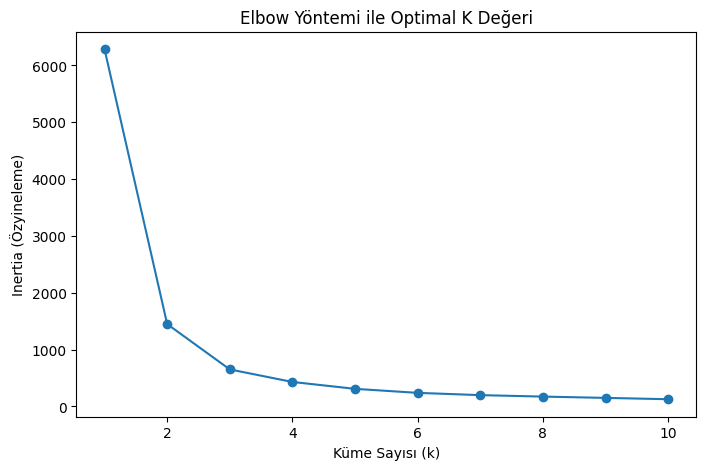

In [ ]:
# dirsek methodunun g√∂rseli
plt.figure(figsize=(8, 5)) # Grafik boyutlarƒ± ayarlandƒ±.
plt.plot(k_values, inertia, marker="o", linestyle="-")  # Inertia deƒüerleri √ßizgi grafiƒüi ile g√∂rselle≈ütirildi.
plt.xlabel("K√ºme Sayƒ±sƒ± (k)")
plt.ylabel("Inertia (√ñzyineleme)")
plt.title("Elbow Y√∂ntemi ile Optimal K Deƒüeri")
plt.show()

In [ ]:
# Sil√ºet skorlarƒ± hesaplandƒ±. (en iyi k= 2 √ßƒ±ktƒ±)
silhouette_scores = {} # Sil√ºet skorlarƒ±nƒ± saklamak i√ßin s√∂zl√ºk olu≈üturuldu.
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # K-means modeli olu≈üturuldu.
    clusters = kmeans.fit_predict(df_scaled) # Veri k√ºmelendi ve tahmin edilen k√ºmeler alƒ±ndƒ±.
    silhouette_scores[k] = silhouette_score(df_scaled, clusters) # Sil√ºet skoru hesaplandƒ± ve s√∂zl√ºƒüe eklendi.
print("Silhouette Skorlarƒ±:", silhouette_scores) # Sil√ºet skorlarƒ± yazdƒ±rƒ±ldƒ±.

Silhouette Skorlarƒ±: {2: 0.6426392811966303, 3: 0.6076352421131751, 4: 0.5629752017851273, 5: 0.5516171983553061}


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # K-means modeli 2 k√ºme ile olu≈üturuldu.
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled) # K√ºmeleme i≈ülemi yapƒ±ldƒ± ve sonu√ßlarƒ± "Cluster" s√ºtununa eklendi.


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(
    self=Index(['Country', 'Freedom Score'], dtype='object'),
    key='Year'
)
   3804         try:
-> 3805             return self._engine.get_loc(casted_key)
        self._engine.get_loc = <bound method IndexEngine.get_loc of <pandas._libs.index.ObjectEngine object at 0x7979179ca9e0>>
        casted_key = 'Year'
   3806         except KeyError as err:

index.pyx in pandas._libs.index.IndexEngine.get_loc()

index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'Year'

The above exception was the direct cause of the following exception:

KeyError             

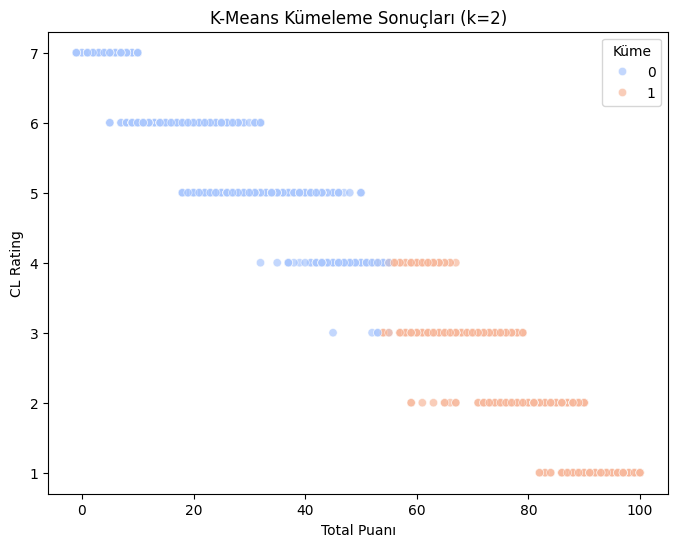

In [ ]:
# K√ºmeleme sonu√ßlarƒ± g√∂rselle≈ütirildi.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_cluster["Total"],
    y=df_cluster["CL rating"],
    hue=df_cluster["Cluster"],
    palette="coolwarm",
    alpha=0.7
)
plt.xlabel("Total Puanƒ±")
plt.ylabel("CL Rating")
plt.title("K-Means K√ºmeleme Sonu√ßlarƒ± (k=2)")
plt.legend(title="K√ºme")
plt.show()

In [ ]:
df["Cluster"] = df_cluster["Cluster"] # K√ºmeleme sonu√ßlarƒ± ana veri setine eklendi.
print(df[["Country/Territory", "Total", "PR rating", "CL rating", "Cluster"]].head(10)) # ƒ∞lk 10 satƒ±r g√∂r√ºnt√ºlendi.

     Country/Territory  Total  PR rating  CL rating  Cluster
0             Abkhazia     40          5          5        0
1          Afghanistan     10          7          6        0
2              Albania     67          3          3        1
3              Algeria     32          6          5        0
4              Andorra     93          1          1        1
5               Angola     30          6          5        0
6  Antigua and Barbuda     85          2          2        1
7            Argentina     84          2          2        1
8              Armenia     55          4          4        0
9            Australia     95          1          1        1


In [ ]:
cluster_counts = df["Cluster"].value_counts() # Her bir k√ºmenin ka√ß √ºlke i√ßerdiƒüi g√∂sterildi.
cluster_countries = df.groupby("Cluster")["Country/Territory"].apply(list) # Her k√ºme i√ßin √ºlkeler bir liste olarak gruplandƒ±.

cluster_counts, cluster_countries # K√ºme sayƒ±larƒ± ve √ºlkeler g√∂sterildi.

(Cluster
 1    1183
 0     912
 Name: count, dtype: int64,
 Cluster
 0    [Abkhazia, Afghanistan, Algeria, Angola, Armen...
 1    [Albania, Andorra, Antigua and Barbuda, Argent...
 Name: Country/Territory, dtype: object)

In [ ]:
cluster_means = df.groupby("Cluster")[["Total", "PR rating", "CL rating"]].mean() # Her k√ºme i√ßin belirtilen s√ºtunlarƒ±n ortalamalarƒ± hesaplandƒ±.
cluster_means # K√ºme ortalamalarƒ± g√∂sterildi.

Total  PR rating  CL rating
Cluster                                 
0        27.407895   5.813596   5.354167
1        81.226543   1.850380   1.996619

In [ ]:
sample_countries_cluster_0 = df[df["Cluster"] == 0]["Country/Territory"].head(10).tolist() # K√ºme 0'daki ilk 10 √ºlke listeye √ßevirildi.
sample_countries_cluster_1 = df[df["Cluster"] == 1]["Country/Territory"].head(10).tolist() # K√ºme 1'deki ilk 10 √ºlke listeye √ßevirildi.

sample_countries_cluster_0, sample_countries_cluster_1  # Her iki k√ºmenin √∂rnek √ºlkeleri g√∂sterildi.

(['Abkhazia',
  'Afghanistan',
  'Algeria',
  'Angola',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Belarus',
  'Benin'],
 ['Albania',
  'Andorra',
  'Antigua and Barbuda',
  'Argentina',
  'Australia',
  'Austria',
  'Bahamas',
  'Barbados',
  'Belgium',
  'Belize'])

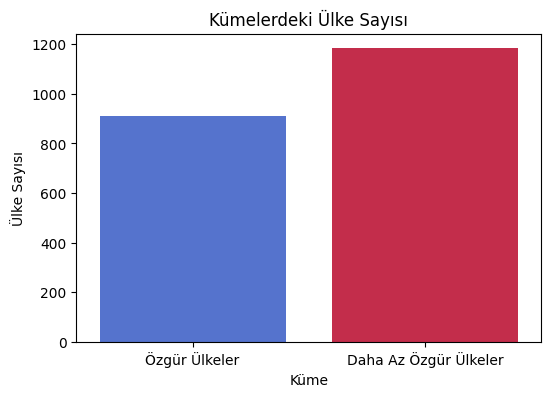

In [ ]:
# K√ºmelerdeki √úlke Sayƒ±sƒ±nƒ±n Barplot ile G√∂sterimi
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette=["royalblue", "crimson"], legend=False)
plt.xlabel("K√ºme")
plt.ylabel("√úlke Sayƒ±sƒ±")
plt.title("K√ºmelerdeki √úlke Sayƒ±sƒ±")
plt.xticks([0, 1], ["√ñzg√ºr √úlkeler", "Daha Az √ñzg√ºr √úlkeler"])
plt.show()  # Grafiƒüi g√∂sterir




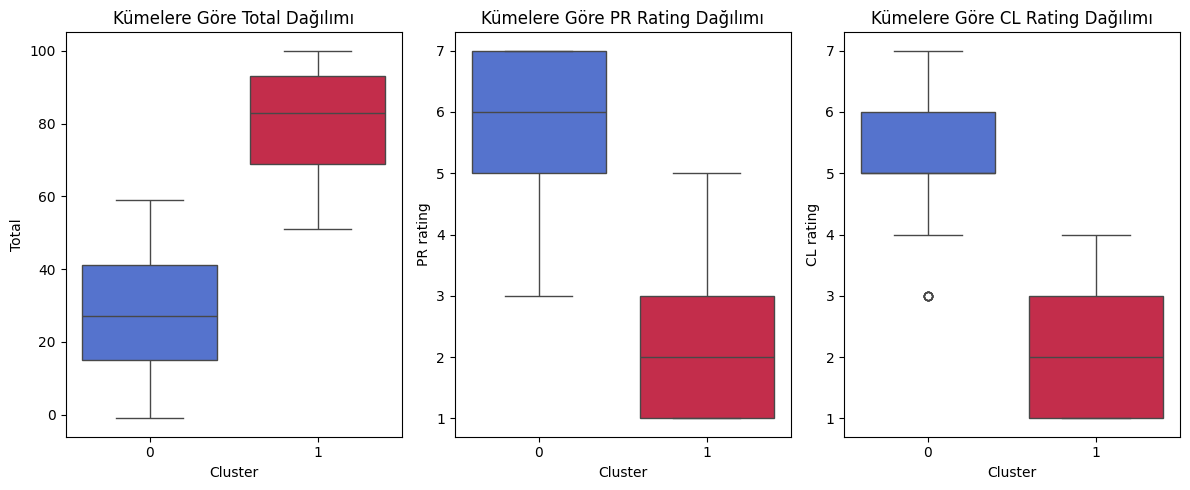

In [ ]:
#K√ºmelere G√∂re Total, PR ve CL Rating Daƒüƒ±lƒ±mƒ± i√ßin boxplot g√∂sterimi
plt.figure(figsize=(12, 5))

# Total daƒüƒ±lƒ±mƒ±
plt.subplot(1, 3, 1)
sns.boxplot(x=df["Cluster"], y=df["Total"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("K√ºmelere G√∂re Total Daƒüƒ±lƒ±mƒ±")

# PR rating daƒüƒ±lƒ±mƒ±
plt.subplot(1, 3, 2)
sns.boxplot(x=df["Cluster"], y=df["PR rating"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("K√ºmelere G√∂re PR Rating Daƒüƒ±lƒ±mƒ±")

# CL rating daƒüƒ±lƒ±mƒ±
plt.subplot(1, 3, 3)
sns.boxplot(x=df["Cluster"], y=df["CL rating"], hue=df["Cluster"], palette=["royalblue", "crimson"], legend=False)
plt.title("K√ºmelere G√∂re CL Rating Daƒüƒ±lƒ±mƒ±")

plt.tight_layout()
plt.show()


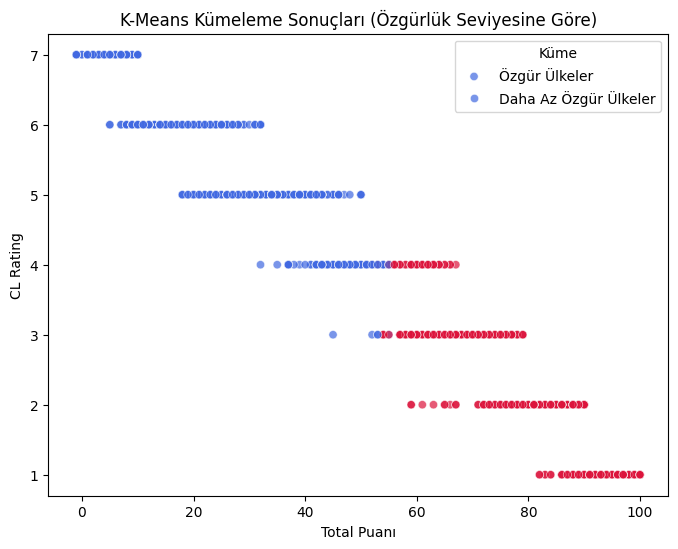

In [ ]:
# K√ºmelerin Daƒüƒ±lƒ±mƒ±nƒ±n Scatterplot ile G√∂sterimi
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Total"],
    y=df["CL rating"],
    hue=df["Cluster"],
    palette=["royalblue", "crimson"],
    alpha=0.7
)
plt.xlabel("Total Puanƒ±")
plt.ylabel("CL Rating")
plt.title("K-Means K√ºmeleme Sonu√ßlarƒ± (√ñzg√ºrl√ºk Seviyesine G√∂re)")
plt.legend(title="K√ºme", labels=["√ñzg√ºr √úlkeler", "Daha Az √ñzg√ºr √úlkeler"])
plt.show()

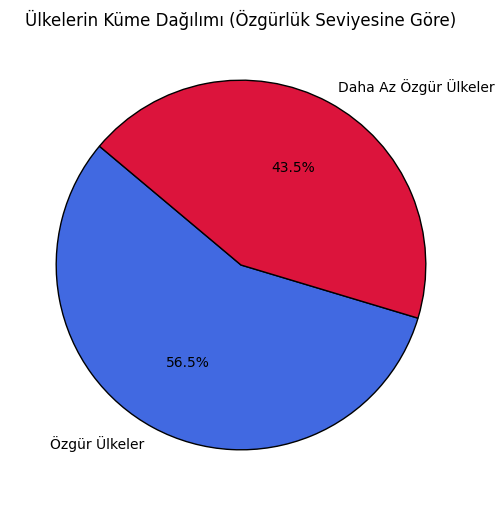

In [ ]:
# K√ºme Daƒüƒ±lƒ±mƒ±nƒ±n Pasta Grafiƒüi ile G√∂sterimi
plt.figure(figsize=(6, 6))
plt.pie(
    cluster_counts.values,
    labels=["√ñzg√ºr √úlkeler", "Daha Az √ñzg√ºr √úlkeler"],
    autopct="%1.1f%%",
    colors=["royalblue", "crimson"],
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("√úlkelerin K√ºme Daƒüƒ±lƒ±mƒ± (√ñzg√ºrl√ºk Seviyesine G√∂re)")
plt.show()
